**Import Liberaries**


In [108]:
# import pandas, matplotlib, seanbearn, sckit-llearn, openpyxl

# **Import Liberaries**

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
!pip install scikit-learn
from sklearn import *
import openpyxl


**import the file**

In [109]:
# read csv file

df = pd.read_csv('/content/online_retail_II.csv')


df.head(10)



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [110]:
# look at rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


**Insights**
customer id is missing data but not a ton
want to change invoiceDate from obj to datetime

In [111]:
# change invoiceDate from obj to dateTime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Summary Stats

In [112]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


**Insights**

The Quantity column has a minimum value of -9600, which is unusual as quantities are generally expected to be non-negative in retail sales data. This could indicate returns, errors, or fraudulent transactions.

The Price column also has a negative minimum value of -53594.36, which is another red flag. Prices should typically be non-negative unless representing some sort of discount or error.

Mean and Median for quantity are significantly different

In [113]:
# get descibe for object data
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [114]:
# look at missing customer id
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


**Insights**

will drop the nan customers since it cannot be linked to a product.

In [115]:
# look at negative quantity
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


**Insights**

Most negative quantiy have a C prefix before the number.

According to the data info giving C stands for cancellation

In [116]:
# look at the different type of invoice
df["Invoice"] = df["Invoice"].astype("str")


In [117]:
df[df["Invoice"].str.match("^\\d{6}%") == False].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [118]:
df['Invoice'].str.replace(("[0-9]"),"", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

we are getting C and A

In [119]:
df[df["Invoice"].str.startswith("A") == True].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Will remove these Invoices with A. Only 3 of theme and they are linked to the NaN customer id. The A invoice seems like accounting records more than anything

In [120]:
# look at the stockcode
df["StockCode"].unique()

array(['85048', '79323P', '79323W', ..., '22935', '22933', '21120'],
      dtype=object)

In [121]:
df["StockCode"] = df["StockCode"].astype("str")

In [122]:
df[df["StockCode"].str.match("^\\d{5}$") == False].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.0,United Kingdom
46,489437,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom
62,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom


In [123]:
# making a copy of the data frame for data cleaning
cleaned_df = df.copy()

In [124]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

In [125]:
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)
cleaned_df = cleaned_df[mask]
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [126]:
# Ensure 'StockCode' column is treated as a string
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

# Define the mask with corrected regular expressions and grouping
mask = (
    cleaned_df['StockCode'].str.match('^\\d{5}$') |  # Matches exactly five digits
    cleaned_df['StockCode'].str.match('^[a-zA-Z]{5}$') |  # Matches exactly five letters
    cleaned_df['StockCode'].str.match('^PADS$')  # Matches the exact string "PADS"
)

# Filter the DataFrame using the mask
cleaned_df = cleaned_df[mask]

# Display the first 10 rows of the filtered DataFrame
cleaned_df.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085.0,United Kingdom
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom


In [127]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,437344.000000,437344,437344.000000,350943.000000
mean,11.213084,2010-07-03 09:58:02.483994112,3.366221,15360.244439
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-28 11:02:00,1.250000,13985.000000
50%,4.000000,2010-07-15 11:08:00,2.100000,15311.000000
75%,12.000000,2010-10-18 14:07:00,4.210000,16797.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,109.000782,NaN,5.226559,1678.202935


In [128]:
# drop na in customer id
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

after dropping the NaN for customer id negative quantity if fixed with a min of 1

In [129]:
# look at 0 price
cleaned_df[cleaned_df["Price"] == 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


In [130]:
# look at the leanth of price  = 0  to find out how many records
len(cleaned_df[cleaned_df["Price"] == 0])

27

Since there are only 27 records, we could either filter them out or keep them. Given the small number, I will choose to drop them, as they are likely free products or promotions, which are not the focus of our investigation in this dataset.

In [131]:
# update the dataframe to only include that prices > 0
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [132]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350916.000000,350916,350916.000000,350916.000000
mean,13.700059,2010-07-05 17:14:15.798311168,2.979794,15360.352694
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.078594,NaN,4.424766,1678.162970


In [133]:
# lets look at how much data lost during cleaning processes
len(df) - len(cleaned_df)

174545

In [134]:
len(cleaned_df)/len(df)

0.667825014606222

Dropped around .33% of the data during cleaning.  However, we still have a ton of data of 350,900 to train a model.

### Data Processing

In [135]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [136]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False).agg(
    MonetaryValue = ("SalesLineTotal", "sum"),
    Frequency= ("Invoice", "nunique"),
    LastInvoiceDate= ("InvoiceDate", "max")
)

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,144.02,2,2010-06-28 13:53:00
1,12347.0,966.87,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,1946.64,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
5,12352.0,332.40,2,2010-11-29 10:07:00
6,12353.0,317.76,1,2010-10-27 12:44:00
7,12355.0,329.41,1,2010-05-21 11:59:00
8,12356.0,2092.58,3,2010-11-24 12:24:00
9,12357.0,10468.27,1,2010-11-16 10:05:00


In [137]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
print(max_invoice_date)

2010-12-09 20:01:00


since the data is pretty old we will use the most recent data in the data set which is 2010-12-09

In [138]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [139]:
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,144.02,2,2010-06-28 13:53:00,164
1,12347.0,966.87,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,1946.64,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,332.40,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43
7,12355.0,329.41,1,2010-05-21 11:59:00,202
8,12356.0,2092.58,3,2010-11-24 12:24:00,15
9,12357.0,10468.27,1,2010-11-16 10:05:00,23


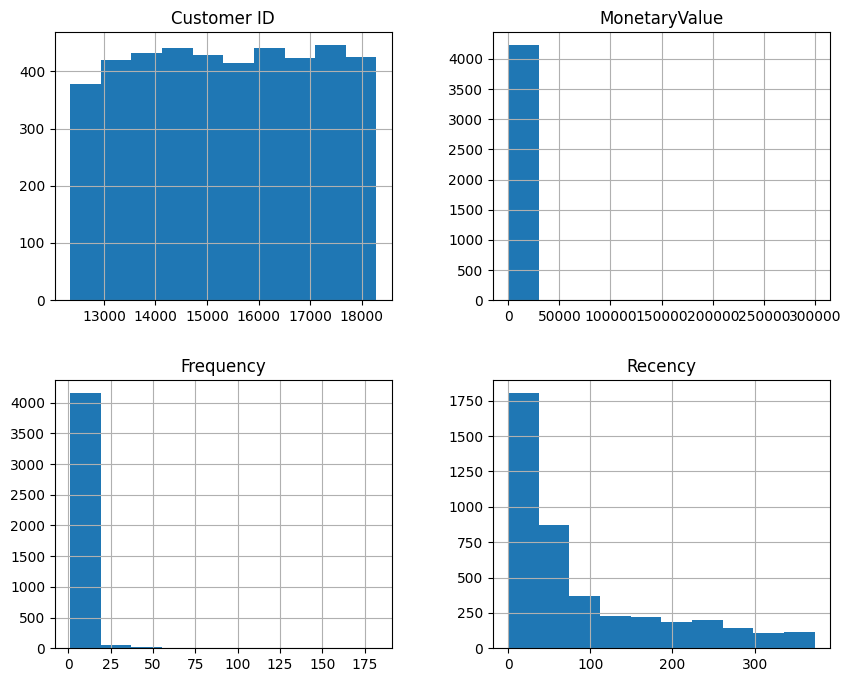

In [140]:


# Select only the numeric columns
numeric_cols = aggregated_df.select_dtypes(include=['number'])

# Create histograms for each numeric column
numeric_cols.hist(figsize=(10, 8))
plt.show()


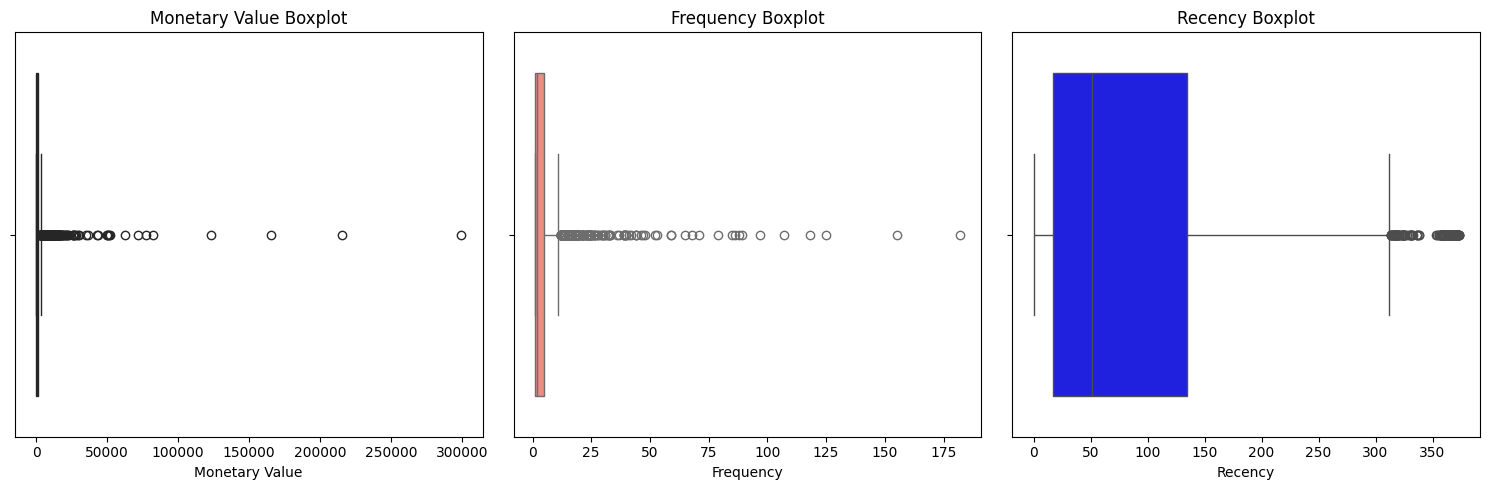

In [141]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=aggregated_df["MonetaryValue"], color='green')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(x=aggregated_df["Frequency"], color='salmon') # Changed 'salman' to 'salmon'
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(x=aggregated_df["Recency"], color='blue')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

**Insights**

Both Monetry Value and Frequency are heavly concentrated around a around a single area and not well distrubuted with a ton of outliears

In [142]:
# going to seperate the outliers to use for eda and not include with in clusters
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
print(M_Q1)

263.895


In [143]:
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
print(M_Q3)

1478.38


In [144]:
# get inter quartie range. this is whats inside the boxplot
M_IQR = M_Q3 - M_Q1
print(M_IQR)


1214.4850000000001


In [145]:
# filter for top and bottom outliers
monetary_outliers_df = aggregated_df[
    (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))
    |
    (aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR))
].copy()

In [146]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,412.000000,412.000000,412.000000,412,412.000000
mean,15083.296117,10433.185937,17.033981,2010-11-10 21:01:28.106796032,28.674757
min,12357.000000,3308.900000,1.000000,2009-12-10 18:03:00,0.000000
25%,13561.750000,3957.300000,8.000000,2010-11-08 13:45:45,3.000000
50%,14956.500000,5389.850000,12.000000,2010-11-26 15:03:30,13.000000
75%,16653.000000,8847.182500,18.000000,2010-12-06 12:47:30,31.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,364.000000
std,1733.822102,22291.545824,19.376882,NaN,49.154417


we have around 412 outliears in the dataset

In [147]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)

F_q3 = aggregated_df["Frequency"].quantile(0.75)
# inter quartile range
F_IQR = F_q3 - F_Q1

In [148]:
# filter for top and bottom for frequency with a new dataframe
freguency_outliers_df = aggregated_df[
    (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))
   |
    (aggregated_df["Frequency"] > (F_q3 + 1.5 * F_IQR))
].copy()

In [149]:
freguency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,269.000000,269.000000,269.000000,269,269.000000
mean,15392.802974,12298.980725,23.698885,2010-11-23 16:23:39.033456896,15.866171
min,12437.000000,898.140000,12.000000,2010-05-12 16:51:00,0.000000
25%,13831.000000,3638.010000,13.000000,2010-11-21 10:38:00,2.000000
50%,15527.000000,5572.670000,17.000000,2010-12-02 12:09:00,7.000000
75%,16883.000000,10269.460000,24.000000,2010-12-07 12:43:00,18.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,211.000000
std,1748.380712,27198.754282,21.578787,NaN,26.789616


we have around 269 outliers

In [150]:
# create a new dataframe for non outliers
non_outliers_df = aggregated_df[
    ~aggregated_df.index.isin(monetary_outliers_df.index)
    &
    ~aggregated_df.index.isin(freguency_outliers_df.index)]

In [151]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3785.000000,3785.000000,3785.000000,3785,3785.000000
mean,15372.177279,773.150842,2.856539,2010-09-03 14:28:03.788639232,96.949538
min,12346.000000,2.950000,1.000000,2009-12-01 12:55:00,0.000000
25%,13909.000000,236.400000,1.000000,2010-07-08 16:56:00,22.000000
50%,15379.000000,508.570000,2.000000,2010-10-12 17:17:00,58.000000
75%,16847.000000,1115.970000,4.000000,2010-11-17 13:42:00,154.000000
max,18287.000000,3298.600000,11.000000,2010-12-09 20:01:00,373.000000
std,1691.821226,714.336213,2.232585,NaN,98.123638


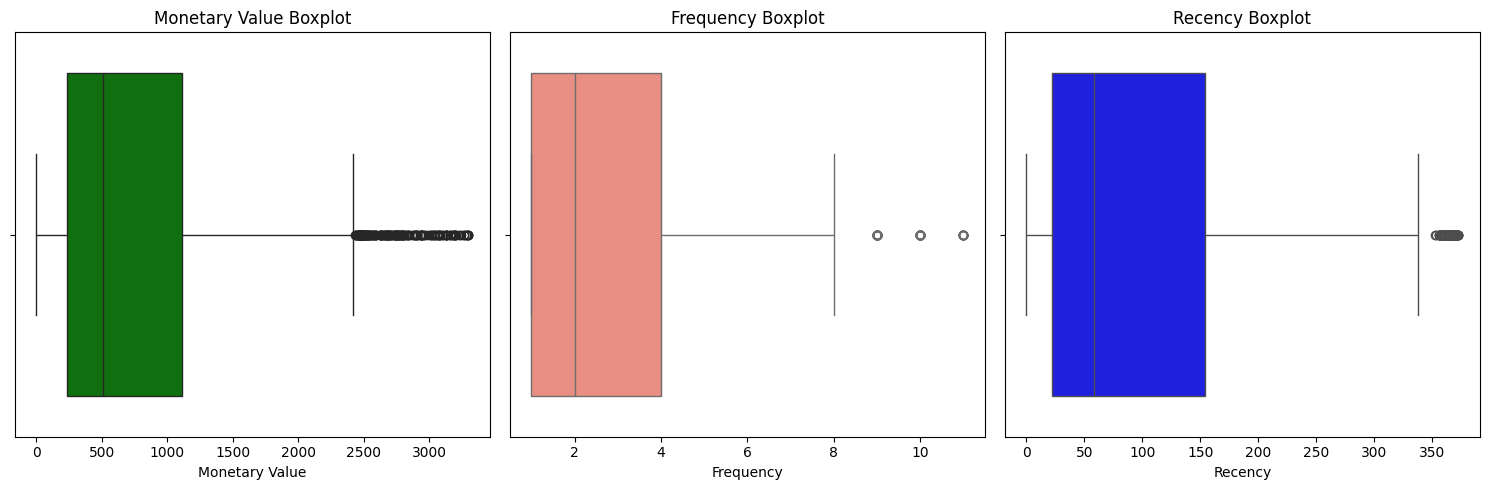

In [152]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=non_outliers_df["MonetaryValue"], color='green')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(x=non_outliers_df["Frequency"], color='salmon') # Changed 'salman' to 'salmon'
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(x=non_outliers_df["Recency"], color='blue')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Date is a lot more distrubted and still outliers.

In [153]:
import plotly.graph_objects as go

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=non_outliers_df['MonetaryValue'],
    y=non_outliers_df['Frequency'],
    z=non_outliers_df['Recency'],
    mode='markers',
    marker=dict(
        size=5,
        color=non_outliers_df['MonetaryValue'],  # Color by monetary value
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Update the layout with labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Monetary Value',
        yaxis_title='Frequency',
        zaxis_title='Recency'
    ),
    title='Interactive 3D Scatter Plot'
)

# Show the interactive plot
fig.show()

The plot reveals that most customers have low monetary values, have not purchased recently, and have low purchase frequency. A few customers, however, display higher values across these metrics, suggesting they are more engaged or valuable.

We need to scale the data since the features have different ranges. Recency is in the hundreds, while monetary value is in the thousands. K-means clustering does not perform well when there are large data range differences between the features. The different scales can cause the centroids to shift toward monetary value instead of frequency and recency. We need to fix this by scaling the data to ensure all features have equal weight.

Standardization (Z-score normalization):

Formula:
(
𝑥
−
mean
)
/
standard deviation
(x−mean)/standard deviation
Recommended when the data follows a normal distribution or when using algorithms that assume data is normally distributed, like K-means clustering.

The formula for standardization (Z-score normalization) is:

𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
​

Where:

𝑧
z = Standardized value (Z-score)
𝑥
x = Original data point
𝜇
μ = Mean of the feature (average of all data points in the feature)
𝜎
σ = Standard deviation of the feature

In [154]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [155]:
scaled_date = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

In [156]:
scaled_date

array([[-0.88083728, -0.3837042 ,  0.68341659],
       [ 0.27122348, -0.3837042 , -0.96777989],
       [-0.77283465, -0.83167471, -0.24410736],
       ...,
       [-0.57690661, -0.83167471,  2.01864337],
       [ 0.24522388, -0.3837042 ,  0.14321033],
       [ 1.07896109,  0.51223682, -0.81489133]])

In [157]:
# convert the scaled_date into a dataframe
scaled_df = pd.DataFrame(scaled_date, index=non_outliers_df.index, columns=["MonetaryValue", "Frequency", "Recency"])

In [158]:
scaled_df.head(10)

,MonetaryValue,Frequency,Recency
0,-0.880837,-0.383704,0.683417
1,0.271223,-0.383704,-0.967780
2,-0.772835,-0.831675,-0.244107
3,1.642986,-0.383704,-0.560077
4,-0.661150,-0.831675,-0.886239
5,-0.617089,-0.383704,-0.886239
6,-0.637586,-0.831675,-0.549884
7,-0.621275,-0.831675,1.070734
8,1.847314,0.064266,-0.835276
10,0.571878,0.064266,-0.886239


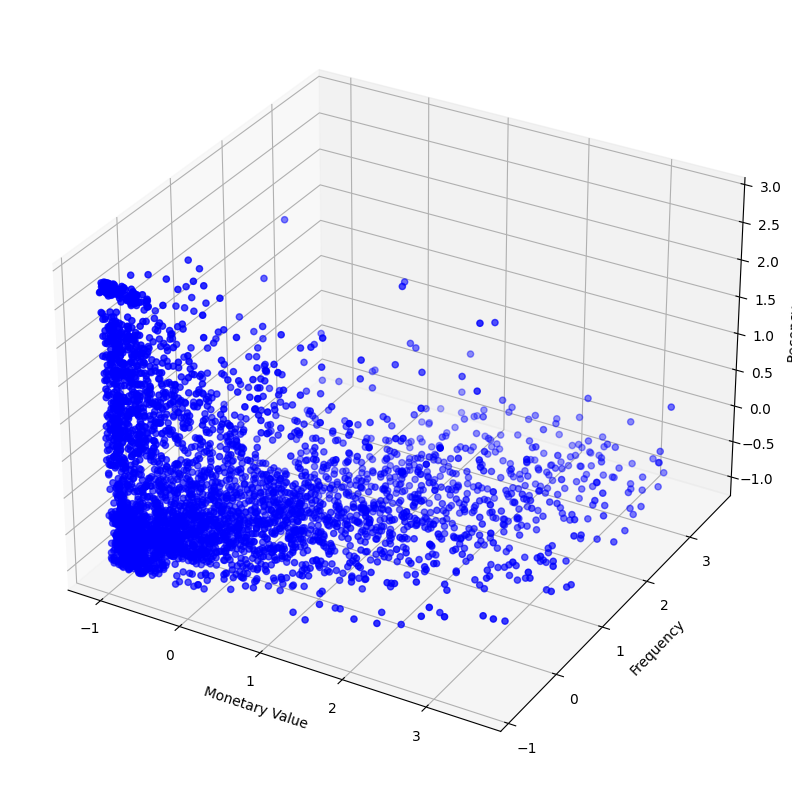

In [159]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_df['MonetaryValue'], scaled_df['Frequency'], scaled_df['Recency'], c='blue', marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.show()



### KMeans Clustering

**Insights**

Seems like between 4-5 is the number of clusters to use

going to use the silhouette score to decide between 4 or 5.  want a higher score whcih indicates more distance

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

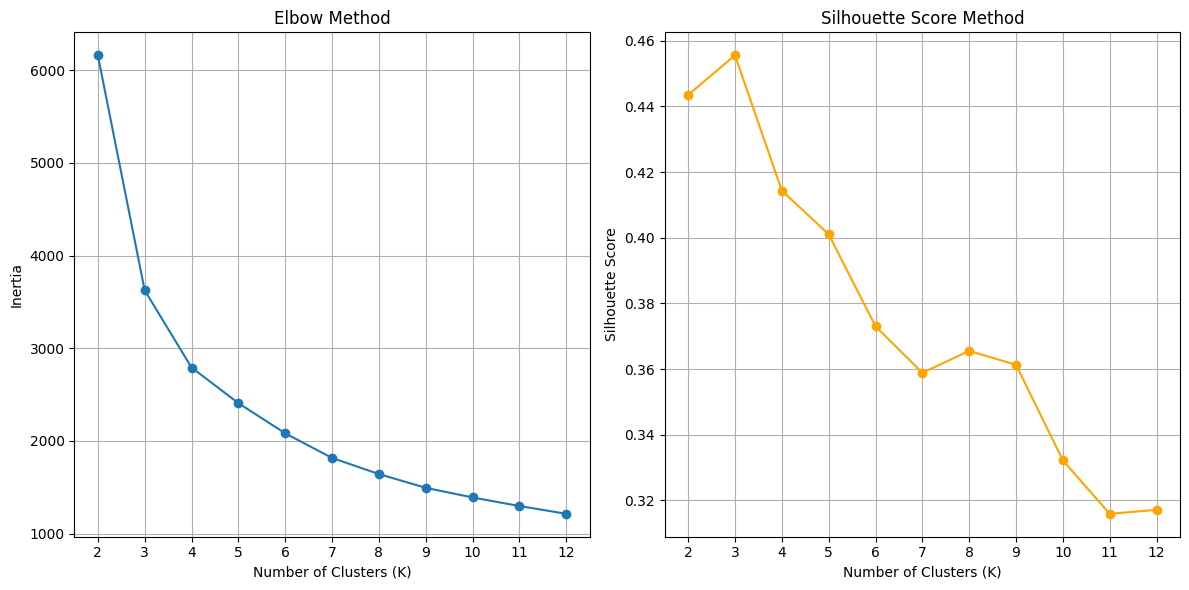

In [160]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # Import silhouette_score

# Determine the optimal number of clusters (K)
max_k = 12
inertia = []
silhouette_scores = []  # Initialize a list to store silhouette scores

k_values = range(2, max_k + 1)  # Get a range from 2 to 12

# Loop through each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_df)  # Fit and predict cluster labels

    inertia.append(kmeans.inertia_)  # Get the average distance between clusters and centroids

    # Calculate and store the silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Inertia (Elbow Method)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


**Insights**

4 clusters have a slighter higher number of sil score.  We should go with 4 clusters

In [161]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_df)
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 0, 0, ..., 1, 0, 2], dtype=int32)

In [162]:
# want to add these lables to the dataframe non_outliers

non_outliers_df["Cluster"] = cluster_labels

<ipython-input-162-71c70c1e6141>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
non_outliers_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,144.02,2,2010-06-28 13:53:00,164,1
1,12347.0,966.87,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,0
3,12349.0,1946.64,2,2010-10-28 08:23:00,42,2
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0
5,12352.0,332.40,2,2010-11-29 10:07:00,10,0
6,12353.0,317.76,1,2010-10-27 12:44:00,43,0
7,12355.0,329.41,1,2010-05-21 11:59:00,202,1
8,12356.0,2092.58,3,2010-11-24 12:24:00,15,2
10,12358.0,1181.61,3,2010-11-29 10:56:00,10,2


In [164]:
# check for nulls
non_outliers_df.isna().sum()

,0
Customer ID,0
MonetaryValue,0
Frequency,0
LastInvoiceDate,0
Recency,0
Cluster,0


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



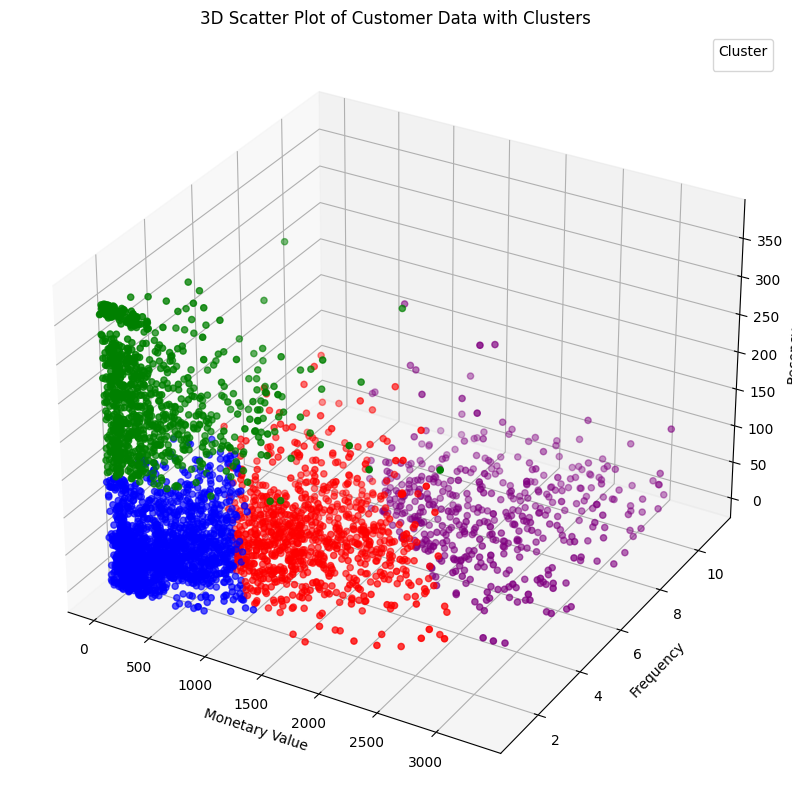

In [165]:
cluster_colors  = {
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'purple'
}
# handle NaN values in the 'Cluster' column
# If the cluster is NaN, assign the color grey
colors = non_outliers_df['Cluster'].map(cluster_colors).fillna('grey')

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    non_outliers_df['MonetaryValue'],
    non_outliers_df['Frequency'],
    non_outliers_df['Recency'],
    c=colors,
    marker='o',

)
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.legend(*scatter.legend_elements(), title="Cluster")
ax.set_title('3D Scatter Plot of Customer Data with Clusters')

plt.show()

The clusters represent different customer types: low-value infrequent buyers (blue), regular but less high-spending customers (green), moderate to high-value frequent buyers (red), and the most valuable, frequent buyers (purple).

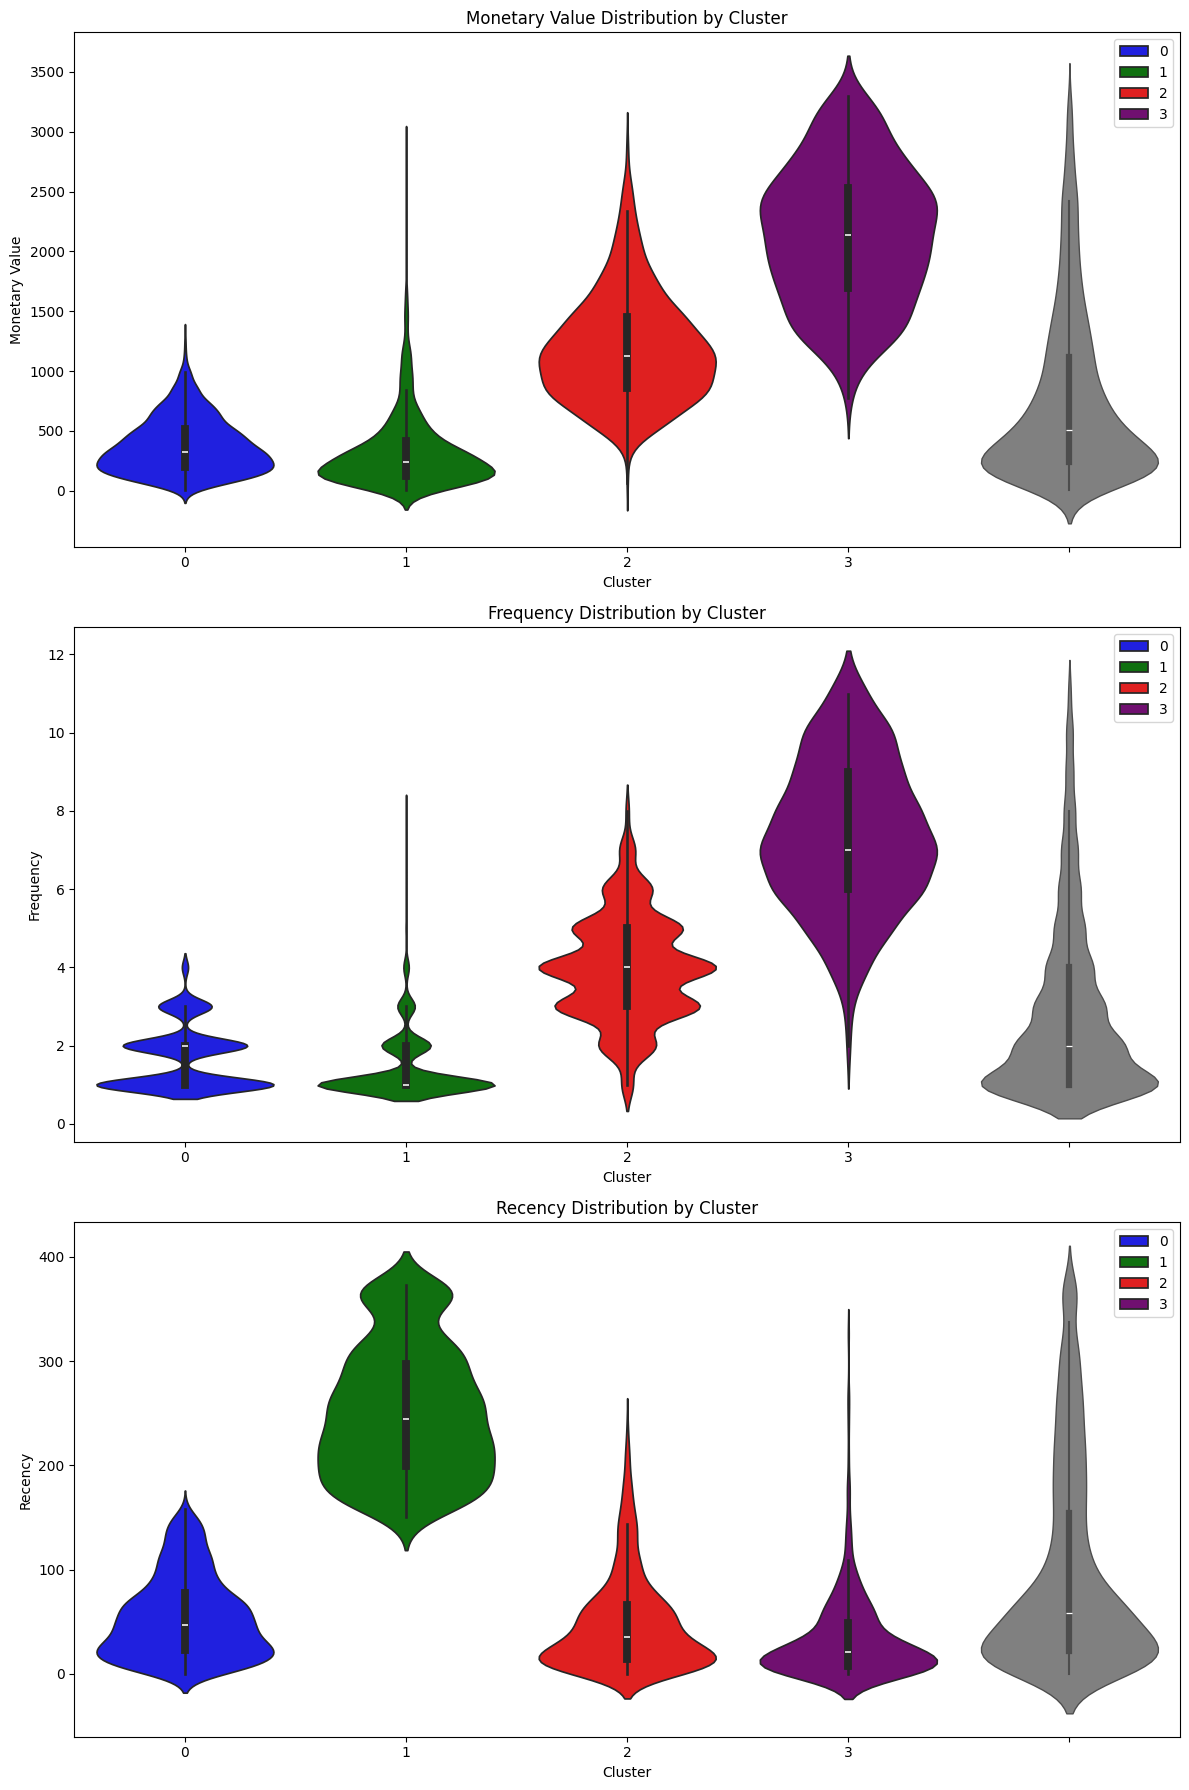

In [166]:

plt.figure(figsize=(12, 18))

plt.subplot(3,1,1,)
# The hue parameter was misspelled. Changed 'Clusters' to 'Cluster'
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["MonetaryValue"], palette=cluster_colors, hue= non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["MonetaryValue"], color = "gray", linewidth=1.0)
plt.title('Monetary Value Distribution by Cluster')

plt.ylabel('Monetary Value')
plt.subplot(3,1,2)
# The hue parameter was misspelled. Changed 'Clusters' to 'Cluster'
# Changed from 'v' to 'Frequency'
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Frequency"], palette=cluster_colors, hue= non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["Frequency"], color = "gray", linewidth=1.0)
plt.title('Frequency Distribution by Cluster')
plt.ylabel('Frequency')
plt.subplot(3,1,3)
# The hue parameter was misspelled. Changed 'Clusters' to 'Cluster'
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Recency"], palette=cluster_colors, hue= non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["Recency"], color = "gray", linewidth=1.0)
plt.title('Recency Distribution by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Insights**

Cluster 0 (Blue) consists of low-value, infrequent, but recent buyers.

Cluster 1 (Green) includes customers with moderate monetary values, lower frequency, and higher recency, indicating less recent transactions.

Cluster 2 (Red) represents customers with moderate to high monetary values and frequency but relatively recent transactions.

Cluster 3 (Purple) represents the most valuable customers with the highest monetary value, highest frequency, and recent transactions.



### Cluster Labels and Strategies:

1. **Cluster 0 (Blue) - "Retain"**  
   - **Rationale**: This cluster represents high-value customers who purchase regularly but not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
   - **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. **Cluster 1 (Green) - "Re-engage"**  
   - **Rationale**: This cluster consists of moderate-value customers who have have recently purchasse and have low frequency/times of purchase. They are at risk of churning and need re-engagement.
   - **Action**: Use targeted marketing campaigns, such as discounts, personalized messages, or reminders, to encourage them to make a purchase and increase their frequency.

3. **Cluster 2 (Red) - "Nurture"**  
   - **Rationale**: These customers have moderate to high monetary values and purchase frequency, but their transactions are not always recent. They have the potential to become more valuable.
   - **Action**: Focus on nurturing these customers through upselling, cross-selling, and providing additional value through exclusive content or services to increase their engagement and spending.

4. **Cluster 3 (Purple) - "Reward"**  
   - **Rationale**: This cluster includes the most valuable customers who have the highest monetary value, purchase frequency, and recent transactions. They are the top tier of customers.
   - **Action**: Reward these customers with VIP treatment, exclusive access, and high-value rewards to reinforce their loyalty and encourage continued high spending.







Summary of Cluster names


*   Cluster 0: Retain
*   Cluster 1: Re-Engage
*   Cluster 2: Nurture
*   Cluster 3: Reward



In [167]:
overLap_indexces = monetary_outliers_df.index.intersection(freguency_outliers_df.index)

In [168]:
overLap_indexces

Index([  64,   83,   84,   91,  124,  143,  162,  177,  199,  200,
       ...
       4072, 4090, 4108, 4121, 4165, 4199, 4200, 4201, 4205, 4226],
      dtype='int64', length=218)

In [169]:
monetary_only_outliers = monetary_outliers_df.drop(overLap_indexces)
freuency_only_outliers = freguency_outliers_df.drop(overLap_indexces)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overLap_indexces]

In [170]:
monetary_only_outliers["cluster"] = -1
freuency_only_outliers["cluster"] = -2
monetary_and_frequency_outliers["cluster"] = -3

In [171]:
# union the data
outlierClusters = pd.concat([monetary_only_outliers, freuency_only_outliers, monetary_and_frequency_outliers])

In [172]:
outlierClusters.head(20)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
9,12357.0,10468.27,1,2010-11-16 10:05:00,23,-1
25,12380.0,4131.84,4,2010-08-31 14:54:00,100,-1
41,12409.0,11171.42,4,2010-10-15 10:24:00,55,-1
47,12415.0,17985.44,4,2010-11-29 15:07:00,10,-1
59,12429.0,3515.55,5,2010-12-09 12:05:00,0,-1
60,12431.0,3578.80,11,2010-12-01 10:03:00,8,-1
61,12433.0,6873.74,4,2010-12-08 16:49:00,1,-1
63,12435.0,5786.74,4,2010-11-08 10:07:00,31,-1
73,12454.0,12931.44,3,2010-11-09 10:09:00,30,-1
85,12474.0,4486.31,11,2010-11-26 12:19:00,13,-1


In [177]:
# union the data
outlierClusters = pd.concat([monetary_only_outliers, freuency_only_outliers, monetary_and_frequency_outliers])

# create the cluster column for the outlierClusters DataFrame
outlierClusters["cluster"] = [-1,-2,-3]

cluster_colors = {
    -1: 'yellow',
    -2: 'orange',
    -3: 'cyan'

}

plt.figure(figsize=(12, 18))
plt.subplot(3,1,1,)
# removed palette = "cluster" as this was throwing an error
sns.violinplot(x=outlierClusters["cluster"], y=outlierClusters["MonetaryValue"], hue= non_outliers_df["cluster"])
sns.violinplot(y=outlierClusters["MonetaryValue"], color = "gray", linewidth=1.0)
plt.title('Monetary Value Distribution by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outlierClusters["cluster"], y=outlierClusters["Frequency"], palette=cluster_colors, hue= non_outliers_df["cluster"])
sns.violinplot(y=outlierClusters["Frequency"], color = "gray", linewidth=1.0)
plt.title('Frequency Distribution by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlierClusters["cluster"], y=outlierClusters["Recency"], palette=cluster_colors, hue= non_outliers_df["cluster"])
sns.violinplot(y=outlierClusters["Recency"], color = "gray", linewidth=1.0)
plt.title('Recency Distribution by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

ValueError: Length of values (3) does not match length of index (463)

In [178]:
# get eque values for cluster
outlierClusters["cluster"].value_counts()

,count
cluster,
-3,218
-1,194
-2,51


<ipython-input-179-b304eb1a5eec>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-179-b304eb1a5eec>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-179-b304eb1a5eec>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




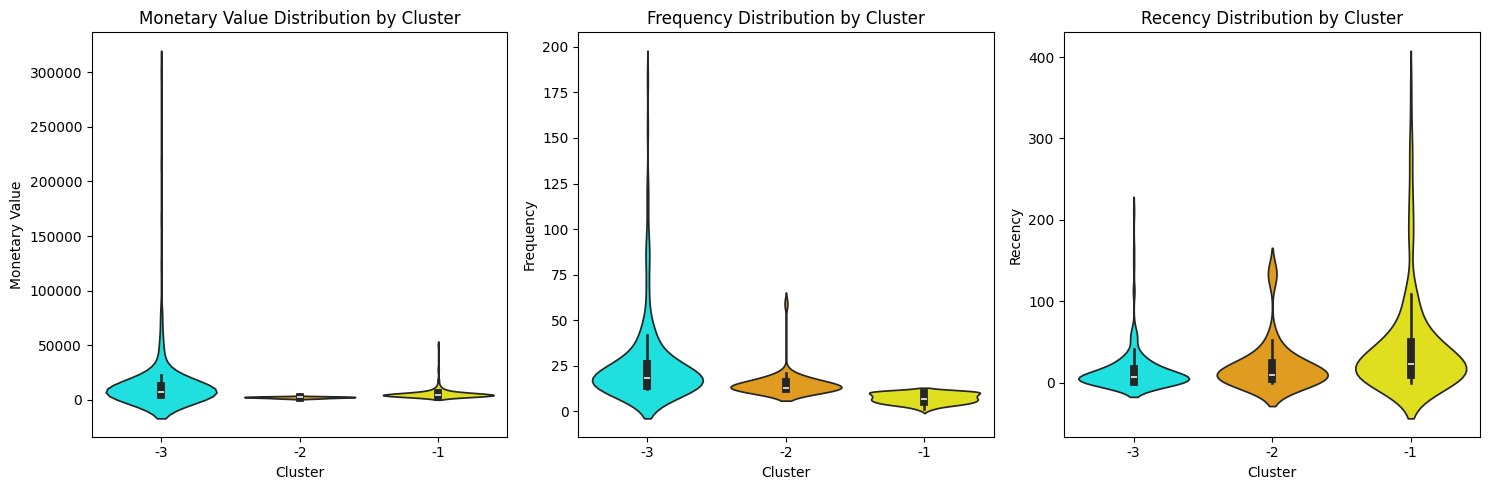

In [179]:
# Mapping cluster colors for consistency
cluster_colors = {
    '0': 'blue',
    '1': 'green',
    '2': 'red',
    '3': 'purple',
    '-1': 'yellow', # Add color for monetary_only_outliers
    '-2': 'orange', # Add color for freuency_only_outliers
    '-3': 'cyan'  # Add color for monetary_and_frequency_outliers
}

# Add cluster color mapping to the DataFrame
outlierClusters['Color'] = outlierClusters['cluster'].map(cluster_colors) # Changed 'Cluster' to 'cluster'

# Create violin plots for each feature
plt.figure(figsize=(15, 5))

# Violin plot for Monetary Value
plt.subplot(1, 3, 1)
sns.violinplot(x='cluster', y='MonetaryValue', data=outlierClusters, palette=cluster_colors) # Changed 'non_outliers_df' to 'outlierClusters'
plt.title('Monetary Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')

# Violin plot for Frequency
plt.subplot(1, 3, 2)
sns.violinplot(x='cluster', y='Frequency', data=outlierClusters, palette=cluster_colors) # Changed 'non_outliers_df' to 'outlierClusters'
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Violin plot for Recency
plt.subplot(1, 3, 3)
sns.violinplot(x='cluster', y='Recency', data=outlierClusters, palette=cluster_colors) # Changed 'non_outliers_df' to 'outlierClusters'
plt.title('Recency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Insights**

The plots show significant outliers, especially in Cluster -3 for both monetary value and frequency, which suggests a few extremely high-value or frequent customers.
These outliers can heavily influence the clustering results and may require further investigation to determine whether they are genuine customers, data errors, or special cases.
Consider handling these outliers by capping or removing them, depending on your business context and analysis goals.

**Cluster Information**



1. **Cluster -3 (Cyan) - "VIP High-Spenders"**  
   - **Characteristics:**
     1. Extremely high monetary value and frequency, indicating a small group of very valuable customers.
     2. Outliers in both monetary value and frequency, likely the top-tier customers.
   - **Actions:**
     1. Provide exclusive offers, early access to new products, or VIP treatment to retain their loyalty.
     2. Personalize communication and reward their engagement with high-value loyalty programs.

2. **Cluster -2 (Orange) - "Loyal Regulars"**  
   - **Characteristics:**
     1. Moderate to low monetary value but consistent purchase behavior, suggesting regular but less high-spending customers.
     2. A few outliers in frequency indicate occasional high purchasing activity.
   - **Actions:**
     1. Nurture these customers through loyalty programs and cross-selling opportunities to increase their average purchase value.
     2. Encourage more frequent purchases by offering promotions or incentives for repeat buys.

3. **Cluster -1 (Yellow) - "At-Risk or Inactive"**  
   - **Characteristics:**
     1. Lower frequency and higher recency values, indicating customers who have not purchased recently and are at risk of becoming inactive.
     2. Moderate monetary value suggests these customers were once engaged but have reduced or stopped their purchasing activity.
   - **Actions:**
     1. Re-engage with targeted campaigns, such as win-back offers, discounts, or reminders to incentivize a return.
     2. Monitor this group closely and prioritize retention efforts before they become fully inactive.

---

.

In [180]:
cluster_labels = {
    0 : 'Retain',
    1 : 'Re-Engage',
    2 : 'Nurture',
    3 : 'Reward',
    -1 : 'At-Risk or Inactive',
    -2 : 'Loyal Regulars',
    -3 : 'VIP High-Spenders'
}

In [181]:
#update outer_cluster column from 'cluster' to' Cluster'

outlierClusters = outlierClusters.rename(columns={'cluster': 'Cluster'})


In [182]:
# union the data
full_clustering_df = pd.concat([non_outliers_df, outlierClusters])

In [187]:
full_clustering_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,144.02,2,2010-06-28 13:53:00,164,1
1,12347.0,966.87,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,0
3,12349.0,1946.64,2,2010-10-28 08:23:00,42,2
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0
5,12352.0,332.40,2,2010-11-29 10:07:00,10,0
6,12353.0,317.76,1,2010-10-27 12:44:00,43,0
7,12355.0,329.41,1,2010-05-21 11:59:00,202,1
8,12356.0,2092.58,3,2010-11-24 12:24:00,15,2
10,12358.0,1181.61,3,2010-11-29 10:56:00,10,2


In [184]:
# check uniue value for cluster
full_clustering_df["Cluster"].value_counts()

,count
Cluster,
0,1530
2,904
1,892
3,459
-3,218
-1,194
-2,51


In [189]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

In [190]:
full_clustering_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,144.02,2,2010-06-28 13:53:00,164,1,Re-Engage
1,12347.0,966.87,2,2010-12-07 14:57:00,2,0,Retain
2,12348.0,221.16,1,2010-09-27 14:59:00,73,0,Retain
3,12349.0,1946.64,2,2010-10-28 08:23:00,42,2,Nurture
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0,Retain
5,12352.0,332.40,2,2010-11-29 10:07:00,10,0,Retain
6,12353.0,317.76,1,2010-10-27 12:44:00,43,0,Retain
7,12355.0,329.41,1,2010-05-21 11:59:00,202,1,Re-Engage
8,12356.0,2092.58,3,2010-11-24 12:24:00,15,2,Nurture
10,12358.0,1181.61,3,2010-11-29 10:56:00,10,2,Nurture


<ipython-input-198-e8cd43be7578>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




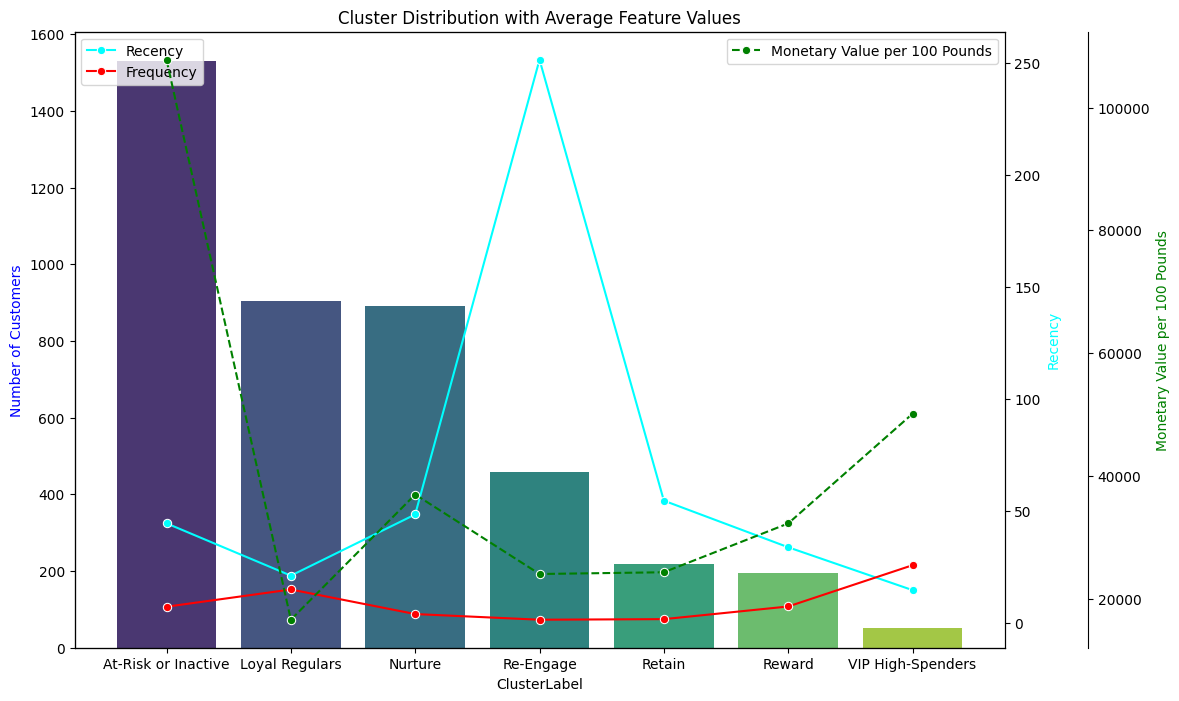

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate cluster count and monetary value per 100 pounds
cluster_count = full_clustering_df["ClusterLabel"].value_counts()
full_clustering_df["Monteryvalue Per 100 Pounds"] = full_clustering_df["MonetaryValue"] / full_clustering_df["Frequency"] * 100.00

# Calculate feature mean for Recency, Frequency, and Monetary Value
feature_mean = full_clustering_df.groupby("ClusterLabel")[['Recency', 'Frequency', 'Monteryvalue Per 100 Pounds']].mean()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the number of customers in each cluster
sns.barplot(x=cluster_count.index, y=cluster_count.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Create a twin axis to plot the line plots for Recency and Frequency
ax2 = ax1.twinx()

# Plot Recency line
sns.lineplot(data=feature_mean.reset_index(), x='ClusterLabel', y='Recency', ax=ax2, color='cyan', marker='o', label='Recency')
ax2.set_ylabel('Recency', color='cyan')

# Plot Frequency line
sns.lineplot(data=feature_mean.reset_index(), x='ClusterLabel', y='Frequency', ax=ax2, color='red', marker='o', label='Frequency')

# Create another twin axis to handle the third line for Monetary Value
ax3 = ax1.twinx()

# Offset the third axis to avoid overlap
ax3.spines["right"].set_position(("outward", 60))

# Plot Monetary Value per 100 Pounds as a dotted line
sns.lineplot(data=feature_mean.reset_index(), x='ClusterLabel', y='Monteryvalue Per 100 Pounds', ax=ax3, color='green', marker='o', linestyle='--', label='Monetary Value per 100 Pounds')
ax3.set_ylabel('Monetary Value per 100 Pounds', color='green')

# Add legend for the lines
ax2.legend(loc='upper left')

# Show the plot
plt.show()


### Insights from the Chart

1. **Number of Customers per Cluster**:
   - The "At-Risk or Inactive" cluster has the highest number of customers, followed by "Loyal Regulars" and "Nurture."
   - The "VIP High-Spenders" cluster has the fewest customers.

2. **Recency**:
   - The "Recency" line shows that customers in the "At-Risk or Inactive" cluster have a high recency value, indicating they haven't purchased recently.
   - The "Recency" value is much lower for "VIP High-Spenders," suggesting these customers are the most recent purchasers.

3. **Frequency**:
   - The "Frequency" line is relatively flat across clusters, with "Loyal Regulars" and "VIP High-Spenders" showing slightly higher frequency values, indicating more frequent purchases compared to other clusters.

4. **Monetary Value per 100 Pounds**:
   - The "Monetary Value per 100 Pounds" line increases steadily across clusters, with "VIP High-Spenders" having the highest monetary value. This suggests that while they are fewer in number, "VIP High-Spenders" contribute significantly more revenue per unit of purchase.

### Summary:

The chart highlights that the "At-Risk or Inactive" cluster has many customers who haven't purchased recently, while "VIP High-Spenders," though fewer in number, are frequent buyers with high monetary value per purchase. This suggests different strategies are needed for engaging each cluster, such as retention efforts for "At-Risk or Inactive" customers and loyalty programs for "VIP High-Spenders."
